# Effects of borrowers' information on prosper Loan borrower rate

## Investigation Overview
<br>I wanted to look at the information of each borrower that could be affect their borrower rate. The main focus was on the variable CreditGrade, Term, ProsperScore, EmploymentStatus, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, DebtToIncomeRatio, LoanOriginationDate, which I think are strongly related with the borrower rate.
## Dataset Overview
<br> This dataset contains borrower rate and 80 attributes for 113937 borrowing records. 68 columns were removed from the analysis due to the weak relevance with the borrower rate. I didn't remove all missing value records because I noticed some of the variables are important but doesn't exist in one record at the same time.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [22]:
loan=pd.read_csv("prosperLoanData.csv")
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [23]:
#I'll first extract the columns I need in the dateset.
col=["BorrowerRate","CreditGrade", "Term", "LenderYield", "ProsperScore", "EmploymentStatus", "IsBorrowerHomeowner", "CreditScoreRangeLower", "CreditScoreRangeUpper", "DebtToIncomeRatio", "LoanOriginationDate"]
loan_sub=loan.loc[:,loan.columns.isin(col)]

In [24]:
loan_clean=loan_sub.copy()

In [25]:
# CreditGrade
ranking=["AA","A","B","C","D","E","HR","NC"]
creditgrade=pd.api.types.CategoricalDtype(ordered=True,categories=ranking)
loan_clean.CreditGrade=loan_clean.CreditGrade.astype(creditgrade)
# ProsperScore
loan_clean["ProsperScore"]=loan_clean["ProsperScore"].astype(str)
prosper=["11.0","10.0","9.0","8.0","7.0","6.0","5.0","4.0","3.0","2.0","1.0"]
prosperscore=pd.api.types.CategoricalDtype(ordered=True,categories=prosper)
loan_clean.ProsperScore=loan_clean.ProsperScore.astype(prosperscore)

In [26]:
loan_clean.Term=loan_clean.Term.astype("category")
loan_clean.EmploymentStatus=loan_clean.EmploymentStatus.astype("category")
loan_clean.LoanOriginationDate=pd.to_datetime(loan_clean.LoanOriginationDate)

## Distribution of borrower rate
<br>***It is a roughly unimodal shape, the borrower rate has a high frequency around 0.15. And it is roughly a right-skewed shape. But, there's a very high frequency around 0.31 and 0.35, making the shape less smoothy.***

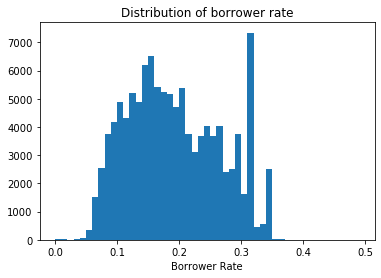

In [27]:
bin_edges1=np.arange(0,0.5,0.01)
plt.hist(data=loan_clean,x="BorrowerRate",bins=bin_edges1);
plt.xlabel("Borrower Rate");
plt.title("Distribution of borrower rate");

## Distribution of Average Credit Score
<br>
<br>Credit score is a measure of a borrowers' ability to pay back the loan. I decided to use the average credit score to replace the two variables (CreditScoreRangeUpper and CreditScoreRangeLower). The distribution of the average credit score is roughly unimodal, and there are more records around 700. The records around 600 are fewer, making the shape less smoothy.

In [28]:
loan_clean["creditscore_avg"]=(loan_clean.CreditScoreRangeUpper+loan_clean.CreditScoreRangeLower)/2

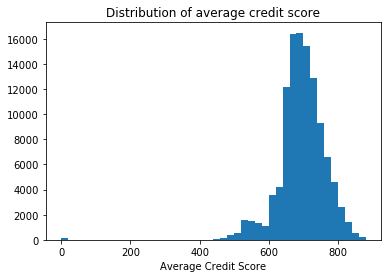

In [29]:
bin_edges=np.arange(0,900,20)
plt.hist(data=loan_clean,x="creditscore_avg",bins=bin_edges);
plt.xlabel("Average Credit Score");
plt.title("Distribution of average credit score");

## Borrower rate vs. average credit score
<br>
<br>There's a negative linear relationship between average credit score and the borrower rate within the range of 400 to 1000 range of credit score. It seems that there's a floor around 0.05 borrower rate. The decreasing trend of borrower rate is getting slower when the average credit score getting higher.

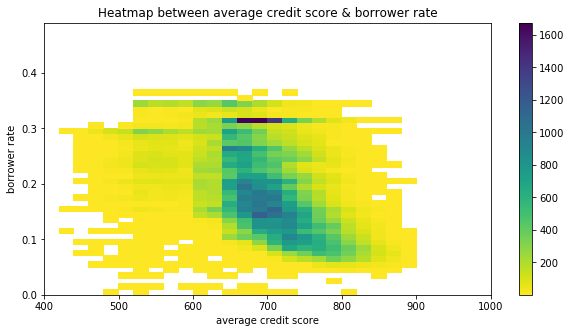

In [30]:
loan_clean_sub1=loan_clean.loc[loan_clean.creditscore_avg.notnull()]
bin_edges10=[np.arange(400,1000,20),np.arange(0,0.5,0.01)]
plt.figure(figsize=(10,5))
plt.hist2d(data=loan_clean_sub1, x="creditscore_avg",y="BorrowerRate",cmap="viridis_r",cmin=0.5,bins=bin_edges10);
plt.xlim((400,1000));
plt.colorbar();
plt.xlabel("average credit score");
plt.ylabel("borrower rate");
plt.title("Heatmap between average credit score & borrower rate");

## Borrower rate vs. Credit Grade
<br>
<br>The lower the credit grade is, the higher the borrower rate is, a similar relationship with borrower rate & average credit score.

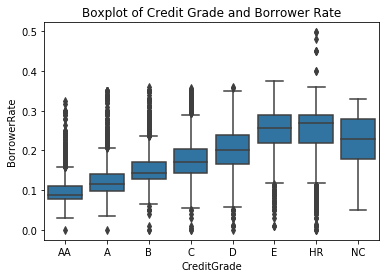

In [31]:
base_color=sb.color_palette()[0]
sb.boxplot(data=loan_clean,x="CreditGrade",y="BorrowerRate",color=base_color);
plt.title("Boxplot of Credit Grade and Borrower Rate");

## Borrower rate vs. Prosper Score
<br>
<br>The higher the prosper score is, the lower the borrower rate could be. 

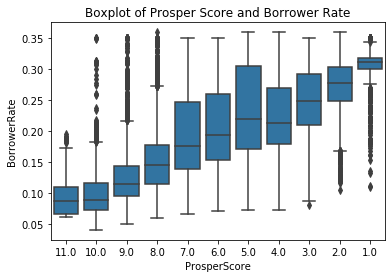

In [32]:
sb.boxplot(data=loan_clean,x="ProsperScore",y="BorrowerRate",color=base_color);
plt.title("Boxplot of Prosper Score and Borrower Rate");

## Borrower rate vs. Debt to Income Ratio by Credit Grade
<br>
<br>After limiting the range of DebtToIncomeRatio to get rid of the outliers, we can see there's a slightly positive linear relationship between borrower rate and debt to income ratio for each credit grade, especially for grade AA, A, and B.

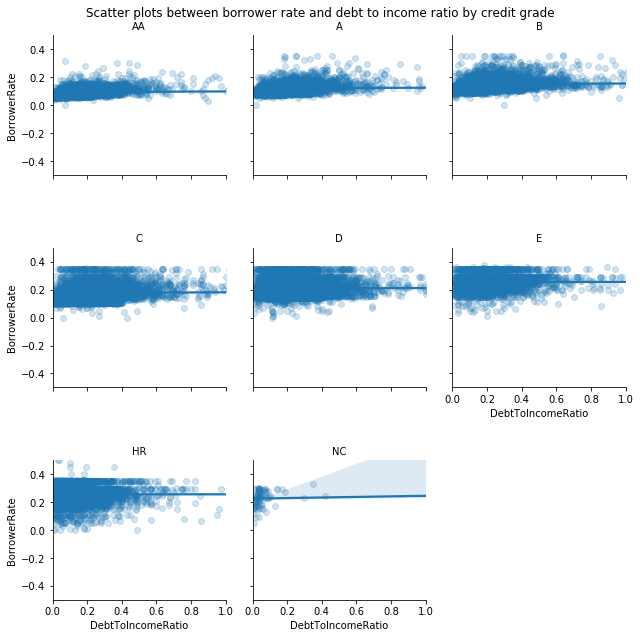

In [33]:
p=sb.FacetGrid(data=loan_clean,col="CreditGrade",col_wrap=3)
p.map(sb.regplot,"DebtToIncomeRatio","BorrowerRate",scatter_kws={"alpha":0.2})
plt.xlim((0,1));
plt.ylim((-0.5,0.5));
p.fig.suptitle("Scatter plots between borrower rate and debt to income ratio by credit grade");
plt.subplots_adjust(top=0.1);
p.set_titles("{col_name}");
p.fig.tight_layout();

## Borrower rate and average credit score by IsBorrowerHomeowner
<br>
<br>By using a heatmap plotting method, I can see the distribution of records clearer. I noticed when the borrowers are not homeowners, there are more records in upper left (lower credit score and higher borrower rate).

In [34]:
def hist2dplot(x, y, **kwargs):
    bins_x = np.arange(15,900,20)
    bins_y = np.arange(0,0.5,0.02)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = "viridis_r", cmin = 0.5)

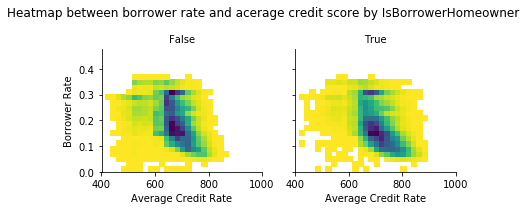

In [35]:
p=sb.FacetGrid(data=loan_clean,col="IsBorrowerHomeowner",col_wrap=2)
p.map(hist2dplot,"creditscore_avg","BorrowerRate").set_axis_labels("Average Credit Rate","Borrower Rate");
plt.xlim((400,1000));
p.fig.suptitle("Heatmap between borrower rate and acerage credit score by IsBorrowerHomeowner");
plt.subplots_adjust(top=0.2);
p.set_titles("{col_name}");
p.fig.tight_layout();

## Borrower rate and average credit score by employment status
<br>
<br>When borrowers are employed or full-time employed, there are more records on the lower right (high credit score & low borrower rate). It is very obvious in the plot when the borrower is full-time employed.

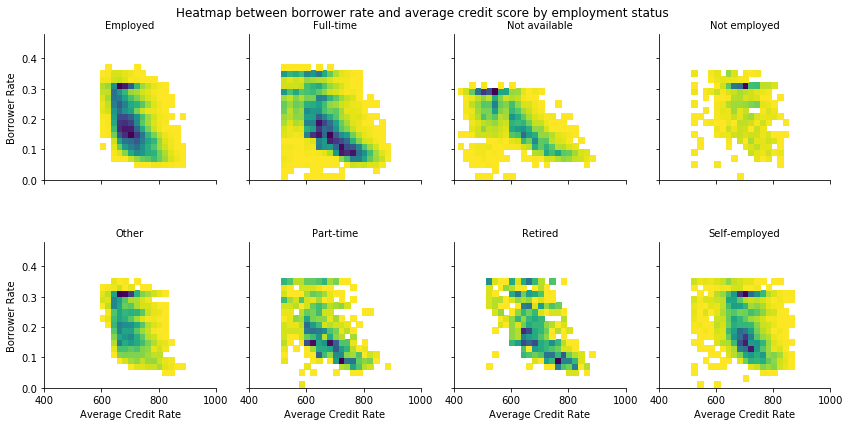

In [36]:
p=sb.FacetGrid(data=loan_clean,col="EmploymentStatus",col_wrap=4);
p.map(hist2dplot,"creditscore_avg","BorrowerRate").set_axis_labels("Average Credit Rate","Borrower Rate");
plt.xlim((400,1000));
p.set_titles("{col_name}");
p.fig.suptitle("Heatmap between borrower rate and average credit score by employment status");
plt.subplots_adjust(top=0.2);
p.fig.tight_layout();

## Borrower rate and average credit score by loan originated year
<br>
<br>As the year went by, the slope of the average credit score and borrower rate is getting more and more steeper, meaning the borrower rate was getting more and more sensitive to the change of credit score. This is reasonable for an economy that was steadily getting stable and growing in the US since the financial crisis from 2007.

In [37]:
loan_clean["year"]=loan_clean.LoanOriginationDate.dt.year
loan_sub_year=loan_clean.loc[(loan_clean.BorrowerRate.notnull())&(loan_clean.creditscore_avg.notnull())&(loan_clean.year.notnull())]

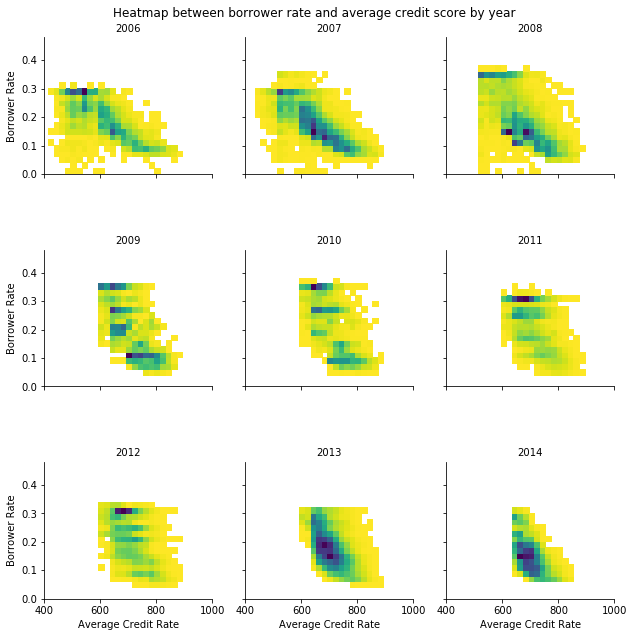

In [38]:
p=sb.FacetGrid(data=loan_sub_year,col="year",col_wrap=3,height=3);
p.map(hist2dplot,"creditscore_avg","BorrowerRate").set_axis_labels("Average Credit Rate","Borrower Rate");
plt.xlim((400,1000));
p.set_titles("{col_name}");
p.fig.suptitle("Heatmap between borrower rate and average credit score by year");
plt.subplots_adjust(top=0.1);
p.fig.tight_layout();

## Borrower rate and average credit score by term
<br>
<br>Borrower rate and average credit score are more centralized when the term is longer. This is reasonable because longterm interest rates are usually more stable than short term interest rates.

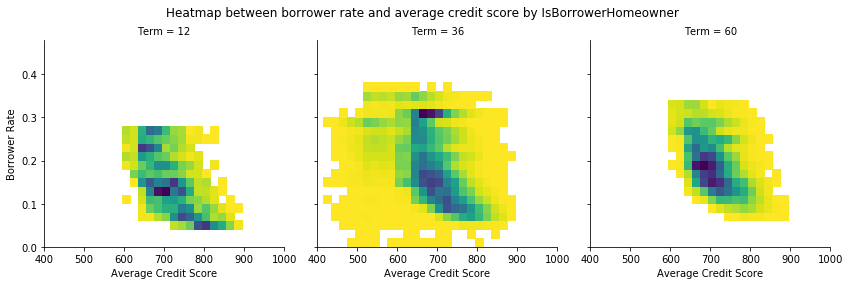

In [42]:
p=sb.FacetGrid(data=loan_clean,col="Term",height=4);
p.map(hist2dplot,"creditscore_avg","BorrowerRate").set_axis_labels("Average Credit Score","Borrower Rate");
plt.xlim((400,1000));
p.fig.suptitle("Heatmap between borrower rate and average credit score by IsBorrowerHomeowner");
plt.subplots_adjust(top=0.2);
p.fig.tight_layout();

In [44]:
!jupyter nbconvert prosper_loan_exploration_part2.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook prosper_loan_exploration_part2.ipynb to slides
[NbConvertApp] Writing 606809 bytes to prosper_loan_exploration_part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\wanghe\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\wanghe\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\wanghe\AppData\Local\Programs\Python\Python36\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\wanghe\appdata\local\programs\python\python36\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\wanghe\appdata\local\programs\python\python36\lib\site-packages\traitlets\con